# SciPy를 이용한 최적화
- SciPy의 optimize 서브 패키지는 최적화 명령 `minimize()`를 제공함
- 세부 알고리즘은 `method` 인수로 선택 가능
    - 디폴트 알고리즘 = BFGS 방법
- `minimize()` : 최적화할 함수와 최적화할 초깃값을 인수로 받음

```python
result = minimize(func, x0, jac=jac)
```
- func : 목적함수
- x0 : 초깃값 벡터
- jac (optional) : 그레디언트 벡터 출력하는 함수 - jacobian

In [9]:
import scipy as sp
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1st try: x_1 = 0.00, g_1 = -4.00
2nd try: x_2 = 1.60, g_2 = -0.80
3rd try: x_3 = 1.92, g_3 = -0.16


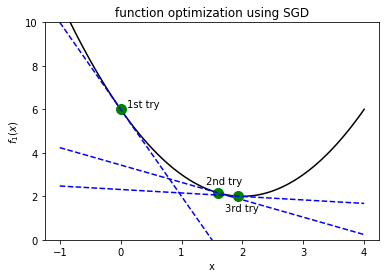

In [17]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1st try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1st try: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2nd try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2nd try: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3rd try")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3rd try: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("function optimization using SGD")
plt.ylim(0, 10)
plt.show()

### scipy.optimize.minimize()
minimize() 명령의 결과는 OptimizeResult 클래스 객체로 다음 속성을 가진다.

- x: 최적화 해
- success: 최적화에 성공하면 True 반환
- status: 종료 상태. 최적화에 성공하면 0 반환
- message: 메시지 문자열
- fun: x 위치에서의 함수의 값
- jac: x 위치에서의 자코비안(그레디언트) 벡터의 값
- hess_inv: x 위치에서의 헤시안 행렬의 역행렬의 값
- nfev: 목적함수 호출 횟수
- njev: 자코비안 계산 횟수
- nhev: 헤시안 계산 횟수
- nit: x 이동 횟수



## 예제
minimize() 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다.

In [7]:
# 목적함수 재정의
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


-     fun: 2.0
- hess_inv: array([[0.5]])
-      jac: array([0.])
-  message: 'Optimization terminated successfully.'
-     nfev: 6
    - 각 iter 때마다 목적함수 2회씩 호출
    - **그레디언트 계산에 필요한 1차 미분 (그레디언트 벡터) 함수나 헤시안 함수가 주어지지 않았음**
    - **(numerical diff.) x값 위치 근처에서 여러 번 함수 계산하여 그레디언트 벡터 근사값을 찾는 방법을 사용**
    - `jac` 인수를 넣어주면 `nfev` 호출횟수 줄어듬
-      nit: 2
    - 두번 점프했음
-     njev: 3
    - 최초 시작전 jac 계산, 이후 iter때마다 계산하여 총 3번
-   status: 0
-  success: True
-        x: array([1.99999999])

### `jac` 인수를 수작업으로 넣어주면?
- `nfev` 호출횟수 감소
- `njev` 자코비안 활용으로 속도 향상

In [18]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


## 예제

다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 한다.

In [21]:
# 2차원 목적함수 재정의(벡터 입력을 받도록)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 1.9756022361030668e-11
 hess_inv: array([[0.50913289, 1.01823656],
       [1.01823656, 2.04141475]])
      jac: array([ 1.02142751e-07, -1.74410930e-08])
  message: 'Optimization terminated successfully.'
     nfev: 216
      nit: 56
     njev: 72
   status: 0
  success: True
        x: array([0.99999556, 0.9999911 ])


### 연습문제 5.1.1
2차원 로젠브록 함수에 대해
1. 초기점 변경하여 보기
2. 그레디언트 벡터 함수를 구현하여 `jac` 인수로 주는 방법으로 계산속도 향상시키기

In [22]:
# 1 초기점 변경 --- 목적함수 호출횟수 216 -> 72회 감소

def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (0, 0)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


In [27]:
# 2 그레디언트 벡터 함수 구현

def f2p(x):
    """f2(x)의 도함수"""
    x0, x1 = x[0], x[1]
    f2p_x0 = -2.0 + 2.0*x0 + 100.0*(-4*x0*x1 + 4*x0**3)
    f2p_x1 = 100.0*(2.0*x1 - 2*x0**2.0)
    return [f2p_x0, f2p_x1]
    #return np.array((2.0**x[0]-1)-400.0*x[0]*(x[1]-x[0]**2), 200.0*(x[1]-x[0]**2))

x0 = (0, 0)
result = sp.optimize.minimize(f2, x0, jac=f2p)
print(result)

      fun: 7.717288259650214e-13
 hess_inv: array([[0.49480256, 0.98953879],
       [0.98953879, 1.98387918]])
      jac: array([ 3.92841204e-06, -2.83120876e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999913, 0.99999825])
